In [1]:
import IPython
import IPython.display
import numpy as np
import pandas as pd
import glob
import joblib  
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import imblearn
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from imblearn.datasets import make_imbalance
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
import numpy as geek 

In [2]:
# !pip install h5py

In [3]:
df1 = pd.read_hdf('D:\Tesis\hdf\gaia\gaia_label_full_22_500.hdf')
yframes = pd.read_hdf('D:\Tesis\hdf\gaia\gaia_output_ful_22_500.hdf')

In [4]:
# yframes = pd.read_hdf('/content/drive/MyDrive/Colab Notebooks/Data/gaia_output_full_diff.hdf')
df2 = pd.read_hdf('D:\Tesis\hdf\gaia\gaia_label_full_diff.hdf')

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
print(df1)

                time        mag
0        1711.234429  19.595734
1        1711.308429  19.755899
2        1733.180046  19.918856
3        1733.356191  19.303412
4        1733.606337  19.871112
...              ...        ...
3886537  1897.958046  14.752536
3886538  1898.208233  15.127580
3886539  1898.458392  15.327697
3886540  1940.361672  15.240801
3886541  1978.841512  15.328986

[3886542 rows x 2 columns]


In [7]:
print(df2)

              time       mag
0         0.074000  0.160165
1        21.871617  0.162957
2         0.176146 -0.615444
3         0.250145  0.567700
4         0.250143 -0.426121
...            ...       ...
3886537   0.250186  0.375043
3886538   0.250159  0.200117
3886539  41.903280 -0.086895
3886540  38.479840  0.088185
3886541   0.074014 -0.219634

[3886542 rows x 2 columns]


In [8]:
df1.columns = ['Time','Mag']
df2.columns = ['diffTime','diffMag']

In [9]:
print(df2)

          diffTime   diffMag
0         0.074000  0.160165
1        21.871617  0.162957
2         0.176146 -0.615444
3         0.250145  0.567700
4         0.250143 -0.426121
...            ...       ...
3886537   0.250186  0.375043
3886538   0.250159  0.200117
3886539  41.903280 -0.086895
3886540  38.479840  0.088185
3886541   0.074014 -0.219634

[3886542 rows x 2 columns]


In [10]:
df = pd.concat([df1, df2], axis=1)

In [11]:
print(df)

                Time        Mag   diffTime   diffMag
0        1711.234429  19.595734   0.074000  0.160165
1        1711.308429  19.755899  21.871617  0.162957
2        1733.180046  19.918856   0.176146 -0.615444
3        1733.356191  19.303412   0.250145  0.567700
4        1733.606337  19.871112   0.250143 -0.426121
...              ...        ...        ...       ...
3886537  1897.958046  14.752536   0.250186  0.375043
3886538  1898.208233  15.127580   0.250159  0.200117
3886539  1898.458392  15.327697  41.903280 -0.086895
3886540  1940.361672  15.240801  38.479840  0.088185
3886541  1978.841512  15.328986   0.074014 -0.219634

[3886542 rows x 4 columns]


In [12]:
print(df.shape)

(3886542, 4)


In [13]:
print(yframes.shape)

(176661, 1)


In [14]:
sample_size = 22

In [15]:
df.head(sample_size+1)

,Time,Mag,diffTime,diffMag
0,1711.234429,19.595734,0.074000,0.160165
1,1711.308429,19.755899,21.871617,0.162957
2,1733.180046,19.918856,0.176146,-0.615444
3,1733.356191,19.303412,0.250145,0.567700
4,1733.606337,19.871112,0.250143,-0.426121
5,1733.856479,19.444991,5.002683,0.479983
6,1738.859162,19.924974,0.250144,-0.250726
7,1739.109307,19.674248,0.074001,0.184989
8,1739.183308,19.859238,0.176145,0.166251
9,1739.359453,20.025488,0.073974,-1.040372


In [16]:
# plt.plot(df.iloc[0:(sample_size-1), 0], df.iloc[0:(sample_size-1), 1])

In [17]:
df.iloc[sample_size-1]

Time        1914.613828
Mag           19.985012
diffTime       0.074013
diffMag       -0.747104
Name: 21, dtype: float64

In [18]:
#yframes lista de clase de salida
df_array = df.to_numpy()
array_flat = np.reshape(df_array,((int(len(df)/sample_size), sample_size, 4)))
#df_array.shape

column_indices = {name: i for i, name in enumerate(df.columns)}

#Tomamos el 10% de la data para test (0.1)
X_train_val, test_df, y_train_val, y_test_df = train_test_split(array_flat, yframes, test_size=0.1, random_state=42)
#Tomamos el 10% de la data para validación (0.11)
X_trainp, val_df, y_trainp, y_val_df = train_test_split(X_train_val, y_train_val, test_size=0.11, random_state=42)

#Generar training, 1-test_size = porcentaje
train_df, trash_x, y_train_df, trash_y = train_test_split(X_trainp, y_trainp, test_size=0.90, random_state=42)

# X_train_val, test_df = train_test_split(array_flat, test_size=0.1, random_state=42)
# train_df, val_df = train_test_split(X_train_val, test_size=0.384, random_state=42)

print('train_df: ',train_df.shape)
print('y_train_df: ',y_train_df.shape)
print('val_df: ',val_df.shape)
print('test_df: ',test_df.shape)
print('trash_x',trash_x.shape)

train_df:  (14150, 22, 4)
y_train_df:  (14150, 1)
val_df:  (17490, 22, 4)
test_df:  (17667, 22, 4)
trash_x (127354, 22, 4)


In [19]:
y_train_df.head()

,class
172301,2
159988,0
5491,1
77075,0
5018,0


2    6465
0    5276
1    1510
4     447
5     312
6      91
3      49
Name: class, dtype: int64

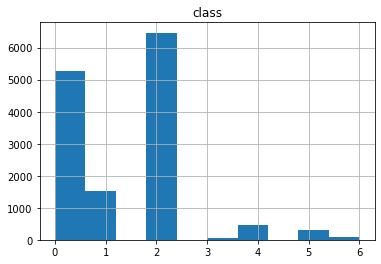

In [20]:
y_train_df.hist('class')
y_train_df['class'].value_counts()

In [21]:
train_df = train_df.reshape(train_df.shape[0]*22 , 4)

In [22]:
train_df.shape

(311300, 4)

In [23]:
print(y_train_df)

        class
172301      2
159988      0
5491        1
77075       0
5018        0
...       ...
64021       0
36177       2
83246       2
31266       5
142285      3

[14150 rows x 1 columns]


In [24]:
y_train_df = y_train_df.to_numpy()

In [25]:
repetitions = 22
y_train_df = geek.repeat(y_train_df, repetitions) 

In [26]:
len(y_train_df)

311300

In [27]:
train_df = pd.DataFrame(train_df)
y_train_df = pd.DataFrame(y_train_df)

In [28]:
train_df.columns = ['Time','Mag','diffTime','diffMag']
y_train_df.columns = ['Class']

In [29]:
print(y_train_df)

        Class
0           2
1           2
2           2
3           2
4           2
...       ...
311295      3
311296      3
311297      3
311298      3
311299      3

[311300 rows x 1 columns]


In [30]:
print(train_df)

               Time        Mag   diffTime   diffMag
0       1702.951816  15.522953  34.370935  0.130284
1       1737.322751  15.653237   0.074003  0.000436
2       1737.396755  15.653673  94.296682  0.021566
3       1831.693437  15.675239   0.073983  0.008456
4       1831.767420  15.683695  51.654304 -0.033496
...             ...        ...        ...       ...
311295  2128.105280  17.604920   0.074001 -0.241334
311296  2128.179281  17.363586  28.913071 -0.130828
311297  2157.092352  17.232758  24.065341  0.216394
311298  2181.157693  17.449152  95.371862  0.025411
311299  2276.529556  17.474564   0.176138 -0.120981

[311300 rows x 4 columns]


In [31]:
labels_gaia_train = pd.concat([train_df, y_train_df], axis=1)

In [32]:
print(labels_gaia_train)

               Time        Mag   diffTime   diffMag  Class
0       1702.951816  15.522953  34.370935  0.130284      2
1       1737.322751  15.653237   0.074003  0.000436      2
2       1737.396755  15.653673  94.296682  0.021566      2
3       1831.693437  15.675239   0.073983  0.008456      2
4       1831.767420  15.683695  51.654304 -0.033496      2
...             ...        ...        ...       ...    ...
311295  2128.105280  17.604920   0.074001 -0.241334      3
311296  2128.179281  17.363586  28.913071 -0.130828      3
311297  2157.092352  17.232758  24.065341  0.216394      3
311298  2181.157693  17.449152  95.371862  0.025411      3
311299  2276.529556  17.474564   0.176138 -0.120981      3

[311300 rows x 5 columns]


Class=2, n=142230 (45.689%)
Class=0, n=116072 (37.286%)
Class=1, n=33220 (10.671%)
Class=4, n=9834 (3.159%)
Class=5, n=6864 (2.205%)
Class=3, n=1078 (0.346%)
Class=6, n=2002 (0.643%)


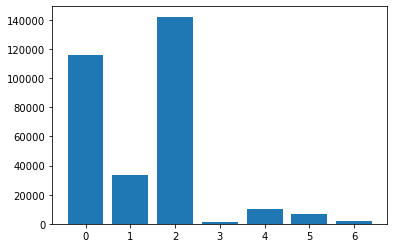

In [33]:
data = labels_gaia_train.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

Class=2, n=142230 (14.286%)
Class=0, n=142230 (14.286%)
Class=1, n=142230 (14.286%)
Class=4, n=142230 (14.286%)
Class=5, n=142230 (14.286%)
Class=3, n=142230 (14.286%)
Class=6, n=142230 (14.286%)


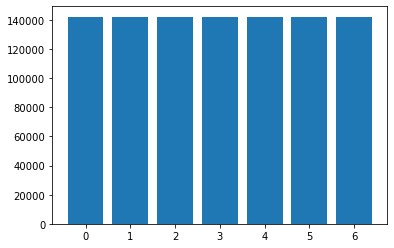

In [34]:
data = labels_gaia_train.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [35]:
print(data)

[[ 1.70295182e+03  1.55229529e+01  3.43709353e+01  1.30284030e-01
   2.00000000e+00]
 [ 1.73732275e+03  1.56532370e+01  7.40033100e-02  4.35900000e-04
   2.00000000e+00]
 [ 1.73739675e+03  1.56536729e+01  9.42966821e+01  2.15657100e-02
   2.00000000e+00]
 ...
 [ 2.15709235e+03  1.72327584e+01  2.40653413e+01  2.16393860e-01
   3.00000000e+00]
 [ 2.18115769e+03  1.74491523e+01  9.53718622e+01  2.54114800e-02
   3.00000000e+00]
 [ 2.27652956e+03  1.74745638e+01  1.76137810e-01 -1.20980770e-01
   3.00000000e+00]]


In [36]:
print(X, y)

[[ 1.70295182e+03  1.55229529e+01  3.43709353e+01  1.30284030e-01]
 [ 1.73732275e+03  1.56532370e+01  7.40033100e-02  4.35900000e-04]
 [ 1.73739675e+03  1.56536729e+01  9.42966821e+01  2.15657100e-02]
 ...
 [ 1.92917263e+03  1.55707499e+01  3.35569315e+01 -1.69479300e-01]
 [ 1.97880097e+03  1.13298597e+01  1.73965996e-01  2.16592664e-02]
 [ 2.17507804e+03  1.56020512e+01  1.61477227e-01 -1.52203792e-02]] [2 2 2 ... 6 6 6]


In [37]:
print(y)

[2 2 2 ... 6 6 6]


In [38]:
train_df = X
y_train_df = y

In [39]:
print(train_df.shape)
print(y_train_df.shape)
print(val_df.shape)
print(test_df.shape)

(995610, 4)
(995610,)
(17490, 22, 4)
(17667, 22, 4)


In [40]:
#train_df.reshape = train_df.shape[0]/22
z = int(train_df.shape[0]/22)
train_df = np.asarray(train_df).reshape(z,22,4)

In [41]:
y_train_df = pd.DataFrame(y_train_df)
y_val_df = pd.DataFrame(y_val_df)
y_test_df = pd.DataFrame(y_test_df)

In [42]:
train_df.shape

(45255, 22, 4)

In [43]:
y_train_df.shape

(995610, 1)

In [44]:
print('train_df: ',train_df.shape)
print('y_train_df: ',y_train_df.shape)
print('val_df: ',val_df.shape)
print('y_val_df: ',y_val_df.shape)

train_df:  (45255, 22, 4)
y_train_df:  (995610, 1)
val_df:  (17490, 22, 4)
y_val_df:  (17490, 1)


In [45]:
y_train_df= y_train_df[y_train_df.index % 22 == 0]

In [46]:
print('train_df: ',train_df.shape)
print('y_train_df: ',y_train_df.shape)
print('val_df: ',val_df.shape)
print('y_val_df: ',y_val_df.shape)

train_df:  (45255, 22, 4)
y_train_df:  (45255, 1)
val_df:  (17490, 22, 4)
y_val_df:  (17490, 1)


In [47]:
#Normalización de siempre
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [48]:
MAX_EPOCHS = 500
checkpoint_filepath = "D:\Tesis\prueba"

def compile_and_fit(model, x, y, x_val,y_val, patience=50):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
#   print(x.shape)
#   print(y.shape)

  # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error',
  #                                                   patience=patience,
  #                                                   mode='min')
  
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

  model.compile(loss=tf.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=['accuracy'])
  #print(model.summary())
  history = model.fit(x, y, epochs=MAX_EPOCHS,
                      validation_data=(x_val, y_val),
                      callbacks=[early_stopping, model_checkpoint_callback])
  return history

In [49]:
lstm_model = tf.keras.models.Sequential([

    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.LSTM(16, return_sequences=False),
    tf.keras.layers.Dense(units=7 , activation = 'softmax')
])

In [50]:
def R_squared(y, y_pred):
  residual = tf.reduce_sum(tf.square(tf.subtract(y, y_pred)))
  total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
  r2 = tf.subtract(1.0, tf.divide(residual, total))
  return r2

In [51]:
from keras.models import load_model 
loaded_model = tf.keras.models.load_model("D:\Tesis\GaiaData2vec\lstm_model_data2vec_gaia.h5",custom_objects={"R_squared": R_squared})


In [52]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnnlstm (CuDNNLSTM)      (None, 22, 128)           68608     
                                                                 
 dropout (Dropout)           (None, 22, 128)           0         
                                                                 
 cu_dnnlstm_1 (CuDNNLSTM)    (None, 22, 64)            49664     
                                                                 
 dropout_1 (Dropout)         (None, 22, 64)            0         
                                                                 
 cu_dnnlstm_2 (CuDNNLSTM)    (None, 16)                5248      
                                                                 
 dense (Dense)               (None, 5)                 85        
                                                                 
Total params: 123,605
Trainable params: 123,605
Non-trai

In [53]:
from keras.models import Model
#Buscar que coicida numero de params con summary
model2 = Model(loaded_model.input, loaded_model.layers[-2].output)
#model2 = Model(loaded_model.input, loaded_model.layers[-3].output)
model2.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnnlstm_input (InputLaye  [(None, 22, 4)]          0         
 r)                                                              
                                                                 
 cu_dnnlstm (CuDNNLSTM)      (None, 22, 128)           68608     
                                                                 
 dropout (Dropout)           (None, 22, 128)           0         
                                                                 
 cu_dnnlstm_1 (CuDNNLSTM)    (None, 22, 64)            49664     
                                                                 
 dropout_1 (Dropout)         (None, 22, 64)            0         
                                                                 
 cu_dnnlstm_2 (CuDNNLSTM)    (None, 16)                5248      
                                                             

In [54]:
x = tf.keras.layers.Dense(units=7 , activation = 'softmax')(loaded_model.layers[-2].output)

model3 = Model(loaded_model.input, [x])

model3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnnlstm_input (InputLaye  [(None, 22, 4)]          0         
 r)                                                              
                                                                 
 cu_dnnlstm (CuDNNLSTM)      (None, 22, 128)           68608     
                                                                 
 dropout (Dropout)           (None, 22, 128)           0         
                                                                 
 cu_dnnlstm_1 (CuDNNLSTM)    (None, 22, 64)            49664     
                                                                 
 dropout_1 (Dropout)         (None, 22, 64)            0         
                                                                 
 cu_dnnlstm_2 (CuDNNLSTM)    (None, 16)                5248      
                                                           

In [55]:
history = compile_and_fit(model3, train_df, y_train_df, val_df, y_val_df)
val_performance = {}
performance = {}
# IPython.display.clear_output()
val_performance['LSTM'] = model3.evaluate(val_df, y_val_df)
performance['LSTM'] = model3.evaluate(test_df, y_test_df, verbose=1)

Epoch 1/500
1415/1415 [==============================] - 11s 7ms/step - loss: 1.6720 - accuracy: 0.2544 - val_loss: 1.2087 - val_accuracy: 0.4505
Epoch 2/500
1415/1415 [==============================] - 10s 7ms/step - loss: 1.5877 - accuracy: 0.2764 - val_loss: 1.2084 - val_accuracy: 0.4515
Epoch 3/500
1415/1415 [==============================] - 10s 7ms/step - loss: 1.5674 - accuracy: 0.2845 - val_loss: 1.1864 - val_accuracy: 0.4980
Epoch 4/500
1415/1415 [==============================] - 10s 7ms/step - loss: 1.5545 - accuracy: 0.2866 - val_loss: 1.1846 - val_accuracy: 0.4585
Epoch 5/500
1415/1415 [==============================] - 10s 7ms/step - loss: 1.5471 - accuracy: 0.2951 - val_loss: 1.1668 - val_accuracy: 0.5078
Epoch 6/500
1415/1415 [==============================] - 9s 7ms/step - loss: 1.5460 - accuracy: 0.3001 - val_loss: 1.1805 - val_accuracy: 0.4938
Epoch 7/500
1415/1415 [==============================] - 10s 7ms/step - loss: 1.5416 - accuracy: 0.3045 - val_loss: 1.1764 - 

Epoch 57/500
1415/1415 [==============================] - 9s 7ms/step - loss: 0.7655 - accuracy: 0.6955 - val_loss: 0.7551 - val_accuracy: 0.7452
Epoch 58/500
1415/1415 [==============================] - 10s 7ms/step - loss: 0.7621 - accuracy: 0.6910 - val_loss: 0.6890 - val_accuracy: 0.7631
Epoch 59/500
1415/1415 [==============================] - 10s 7ms/step - loss: 0.7623 - accuracy: 0.6973 - val_loss: 0.6333 - val_accuracy: 0.7831
Epoch 60/500
1415/1415 [==============================] - 9s 7ms/step - loss: 0.7393 - accuracy: 0.7055 - val_loss: 0.6289 - val_accuracy: 0.7856
Epoch 61/500
1415/1415 [==============================] - 10s 7ms/step - loss: 0.7545 - accuracy: 0.6990 - val_loss: 0.6248 - val_accuracy: 0.7836
Epoch 62/500
1415/1415 [==============================] - 9s 7ms/step - loss: 0.7199 - accuracy: 0.7116 - val_loss: 0.6246 - val_accuracy: 0.7856
Epoch 63/500
1415/1415 [==============================] - 9s 6ms/step - loss: 0.7562 - accuracy: 0.7007 - val_loss: 0.612

Epoch 113/500
1415/1415 [==============================] - 10s 7ms/step - loss: 0.6543 - accuracy: 0.7420 - val_loss: 0.6579 - val_accuracy: 0.7774
Epoch 114/500
1415/1415 [==============================] - 10s 7ms/step - loss: 0.6535 - accuracy: 0.7399 - val_loss: 0.6381 - val_accuracy: 0.7834
Epoch 115/500
1415/1415 [==============================] - 10s 7ms/step - loss: 0.6259 - accuracy: 0.7512 - val_loss: 0.6260 - val_accuracy: 0.7887
Epoch 116/500
1415/1415 [==============================] - 9s 7ms/step - loss: 0.6556 - accuracy: 0.7414 - val_loss: 0.6191 - val_accuracy: 0.7917
Epoch 117/500
1415/1415 [==============================] - 9s 7ms/step - loss: 0.6469 - accuracy: 0.7433 - val_loss: 0.6710 - val_accuracy: 0.7722
Epoch 118/500
1415/1415 [==============================] - 10s 7ms/step - loss: 0.6331 - accuracy: 0.7490 - val_loss: 0.6330 - val_accuracy: 0.7835
Epoch 119/500
1415/1415 [==============================] - 10s 7ms/step - loss: 0.6366 - accuracy: 0.7475 - val_lo

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

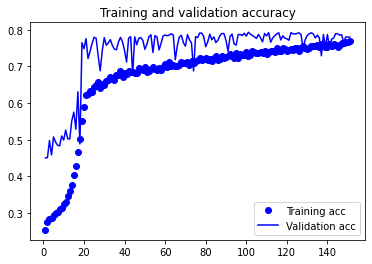

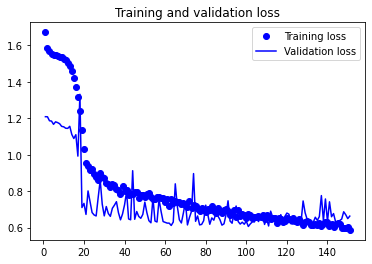

<Figure size 432x288 with 0 Axes>

In [57]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

plt.savefig('filename2.pdf', dpi=300)

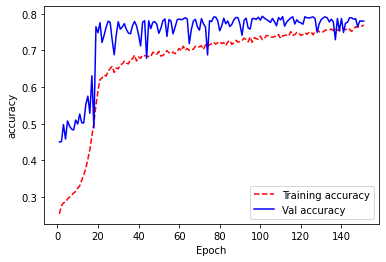

In [58]:
# history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=10, verbose=1)

# Get training and test loss histories
training_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training accuracy', 'Val accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show();

In [59]:
gru_model = tf.keras.models.Sequential([

    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.GRU(128, return_sequences=True),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.GRU(64, return_sequences=True),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.GRU(16, return_sequences=False),
    tf.keras.layers.Dense(units=7 , activation = 'softmax')
])

In [60]:
from keras.models import load_model 
loaded_model1 = tf.keras.models.load_model("D:\Tesis\GaiaData2vec\gru_model_data2vec_gaia.h5",custom_objects={"R_squared": R_squared})

In [61]:
from keras.models import Model

model4 = Model(loaded_model1.input, loaded_model1.layers[-2].output)

model4.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnngru_input (InputLayer  [(None, 22, 4)]          0         
 )                                                               
                                                                 
 cu_dnngru (CuDNNGRU)        (None, 22, 128)           51456     
                                                                 
 dropout_2 (Dropout)         (None, 22, 128)           0         
                                                                 
 cu_dnngru_1 (CuDNNGRU)      (None, 22, 64)            37248     
                                                                 
 dropout_3 (Dropout)         (None, 22, 64)            0         
                                                                 
 cu_dnnlstm_3 (CuDNNLSTM)    (None, 16)                5248      
                                                           

In [62]:
x = tf.keras.layers.Dense(units=7 , activation = 'softmax')(loaded_model1.layers[-2].output)

model5 = Model(loaded_model1.input, [x])

model5.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnngru_input (InputLayer  [(None, 22, 4)]          0         
 )                                                               
                                                                 
 cu_dnngru (CuDNNGRU)        (None, 22, 128)           51456     
                                                                 
 dropout_2 (Dropout)         (None, 22, 128)           0         
                                                                 
 cu_dnngru_1 (CuDNNGRU)      (None, 22, 64)            37248     
                                                                 
 dropout_3 (Dropout)         (None, 22, 64)            0         
                                                                 
 cu_dnnlstm_3 (CuDNNLSTM)    (None, 16)                5248      
                                                           

In [63]:
history = compile_and_fit(model5, train_df, y_train_df, val_df, y_val_df)
val_performance = {}
performance = {}
# IPython.display.clear_output()
val_performance['GRU'] = model5.evaluate(val_df, y_val_df)
performance['GRU'] = model5.evaluate(test_df, y_test_df, verbose=1)

Epoch 1/500
1415/1415 [==============================] - 11s 7ms/step - loss: 1.8357 - accuracy: 0.1978 - val_loss: 1.2242 - val_accuracy: 0.4482
Epoch 2/500
1415/1415 [==============================] - 9s 6ms/step - loss: 1.5752 - accuracy: 0.2768 - val_loss: 1.1984 - val_accuracy: 0.4611
Epoch 3/500
1415/1415 [==============================] - 9s 6ms/step - loss: 1.5588 - accuracy: 0.2852 - val_loss: 1.1931 - val_accuracy: 0.4603
Epoch 4/500
1415/1415 [==============================] - 9s 7ms/step - loss: 1.5947 - accuracy: 0.2782 - val_loss: 1.2538 - val_accuracy: 0.4475
Epoch 5/500
1415/1415 [==============================] - 9s 6ms/step - loss: 1.5872 - accuracy: 0.2816 - val_loss: 1.2231 - val_accuracy: 0.4450
Epoch 6/500
1415/1415 [==============================] - 9s 6ms/step - loss: 1.5861 - accuracy: 0.2802 - val_loss: 1.2281 - val_accuracy: 0.4476
Epoch 7/500
1415/1415 [==============================] - 9s 6ms/step - loss: 1.5688 - accuracy: 0.2861 - val_loss: 1.1947 - val_a

1415/1415 [==============================] - 9s 6ms/step - loss: 0.7708 - accuracy: 0.6947 - val_loss: 0.8057 - val_accuracy: 0.7210
Epoch 58/500
1415/1415 [==============================] - 9s 6ms/step - loss: 0.7221 - accuracy: 0.7153 - val_loss: 0.6445 - val_accuracy: 0.7776
Epoch 59/500
1415/1415 [==============================] - 9s 6ms/step - loss: 0.9843 - accuracy: 0.6212 - val_loss: 0.6866 - val_accuracy: 0.7634
Epoch 60/500
1415/1415 [==============================] - 9s 6ms/step - loss: 0.7986 - accuracy: 0.6848 - val_loss: 0.6821 - val_accuracy: 0.7632
Epoch 61/500
1415/1415 [==============================] - 9s 6ms/step - loss: 0.7498 - accuracy: 0.7039 - val_loss: 0.8679 - val_accuracy: 0.6833
Epoch 62/500
1415/1415 [==============================] - 9s 6ms/step - loss: 0.7376 - accuracy: 0.7113 - val_loss: 0.6994 - val_accuracy: 0.7557
Epoch 63/500
1415/1415 [==============================] - 9s 6ms/step - loss: 0.7434 - accuracy: 0.7090 - val_loss: 0.6521 - val_accuracy

1415/1415 [==============================] - 9s 6ms/step - loss: 1.6855 - accuracy: 0.2580 - val_loss: 1.2334 - val_accuracy: 0.4500
Epoch 114/500
1415/1415 [==============================] - 9s 6ms/step - loss: 1.6419 - accuracy: 0.2661 - val_loss: 1.2288 - val_accuracy: 0.4504
Epoch 115/500
1415/1415 [==============================] - 9s 6ms/step - loss: 1.5837 - accuracy: 0.2762 - val_loss: 1.2053 - val_accuracy: 0.4501
Epoch 116/500
1415/1415 [==============================] - 9s 6ms/step - loss: 1.5745 - accuracy: 0.2801 - val_loss: 1.2018 - val_accuracy: 0.4501
Epoch 117/500
1415/1415 [==============================] - 9s 6ms/step - loss: 1.6013 - accuracy: 0.2763 - val_loss: 1.2046 - val_accuracy: 0.4504
Epoch 118/500
1415/1415 [==============================] - 9s 6ms/step - loss: 1.5730 - accuracy: 0.2849 - val_loss: 1.2007 - val_accuracy: 0.4643
Epoch 119/500
1415/1415 [==============================] - 9s 6ms/step - loss: 1.5620 - accuracy: 0.2907 - val_loss: 1.1939 - val_ac

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

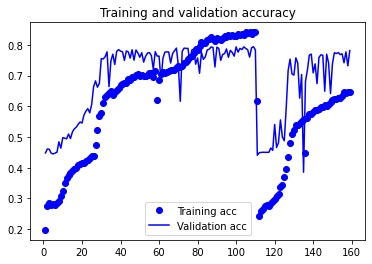

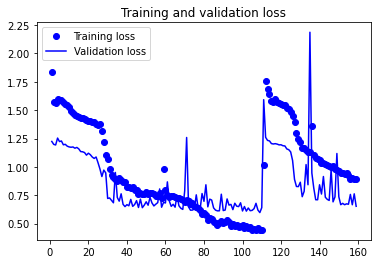

In [65]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# plt.savefig('filename2.pdf', dpi=300)

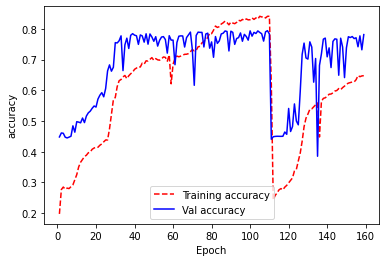

In [66]:
# history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=10, verbose=1)

# Get training and test loss histories
training_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training accuracy', 'Val accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show();